In [3]:
import pandas as pd

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

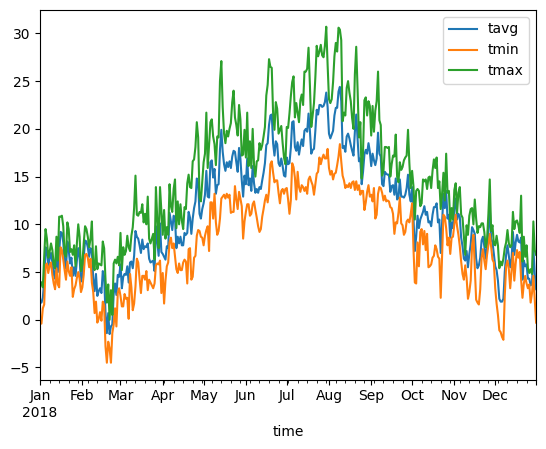

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [25]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/Weather/country_coordinates_manual.csv')

# Set time period
start = datetime(2010, 1, 1)
end = datetime(2023, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        # Create Point for each location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch daily data for the specified period
        data = Daily(location, start, end)
        data = data.fetch()

        # Add country information to the data
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        # Append the data to the weather_data DataFrame
        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        empty_row = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'time': pd.date_range(start=start, end=end)
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Convert date columns to datetime
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

# Display the resulting DataFrame
print(weather_data)

# Save the DataFrame to a CSV file
weather_data.to_csv('weather_data.csv', index=False)

KeyError: 'time'

In [ ]:
import requests
import pandas as pd

url = "https://restcountries.com/v3.1/all"

response = requests.get(url)
data = response.json()

countries = []
for country in data:
    try:
        name = country["name"]["common"]
        capital = country["capital"][0] if "capital" in country and country["capital"] else None
        area = country["area"]
        latlng = country["latlng"]
        countries.append({"Country": name, "Capital": capital, "Area_km2": area, "Latitude": latlng[0], "Longitude": latlng[1]})
    except KeyError:
        continue

countries_df = pd.DataFrame(countries)

countries_df.to_csv("countries_with_coordinates.csv", index=False)

print(countries_df.head())

         Country            Capital  Area_km2   Latitude  Longitude
0  South Georgia  King Edward Point    3903.0 -54.500000 -37.000000
1        Grenada       St. George's     344.0  12.116667 -61.666667
2    Switzerland               Bern   41284.0  47.000000   8.000000
3   Sierra Leone           Freetown   71740.0   8.500000 -11.500000
4        Hungary           Budapest   93028.0  47.000000  20.000000


In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('countries_with_coordinates.csv')

print(coordinates)

# # Set time period
# start = datetime(2018, 1, 1)
# end = datetime(2018, 12, 31)

# for index, row in coordinates.iterrows():
#     try:
#         # Create Point for each location
#         location = Point(row['Latitude'], row['Longitude'])

#         # Fetch daily data for 2018
#         data = Daily(location, start, end)
#         data = data.fetch()

#         # Check and convert temperature columns to numeric
#         if all(col in data.columns for col in ['tavg', 'tmin', 'tmax']):
#             data[['tavg', 'tmin', 'tmax']] = data[['tavg', 'tmin', 'tmax']].apply(pd.to_numeric, errors='coerce')
            
#             # Drop rows where all three temperature columns are NaN
#             data = data.dropna(subset=['tavg', 'tmin', 'tmax'], how='all')
            
#             if not data.empty:
#                 data.plot(y=['tavg', 'tmin', 'tmax'], figsize=(10, 6))
#                 plt.title(f"Weather Data for {row['Country']}")
#                 plt.xlabel("Date")
#                 plt.ylabel("Temperature (°C)")
#                 plt.legend(['Average Temp (tavg)', 'Min Temp (tmin)', 'Max Temp (tmax)'])
#                 plt.grid(True)
#                 plt.show()
#             else:
#                 print(f"No valid temperature data for {row['Country']}.")
#         else:
#             print(f"Required columns missing for {row['Country']}. Data columns: {data.columns}")
#     except Exception as e:
#         print(f"An error occurred while processing data for {row['Country']}: {e}")

           Country            Capital  Area_km2   Latitude   Longitude
0    South Georgia  King Edward Point    3903.0 -54.500000  -37.000000
1          Grenada       St. George's     344.0  12.116667  -61.666667
2      Switzerland               Bern   41284.0  47.000000    8.000000
3     Sierra Leone           Freetown   71740.0   8.500000  -11.500000
4          Hungary           Budapest   93028.0  47.000000   20.000000
..             ...                ...       ...        ...         ...
245        Belgium           Brussels   30528.0  50.833333    4.000000
246         Israel          Jerusalem   20770.0  31.470000   35.130000
247    New Zealand         Wellington  270467.0 -41.000000  174.000000
248      Nicaragua            Managua  130373.0  13.000000  -85.000000
249       Anguilla         The Valley      91.0  18.250000  -63.166667

[250 rows x 5 columns]


In [20]:
import pandas as pd

countries_df = pd.read_csv('countries_with_coordinates.csv')

sorted_countries_df = countries_df.sort_values(by="Country")

sorted_file_path = "countries_sorted_alphabetically.csv"
sorted_countries_df.to_csv(sorted_file_path, index=False)

sorted_file_path

FileNotFoundError: [Errno 2] No such file or directory: 'countries_with_coordinates.csv'

In [19]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/countries_sorted_alphabetically.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        location = Point(row['Latitude'], row['Longitude'])

        data = Daily(location, start, end)
        data = data.fetch()

        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        empty_row = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'time': pd.date_range(start=start, end=end)
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Convert date columns to datetime
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

print(weather_data)

weather_data.to_csv('weather_data.csv', index=False)

KeyboardInterrupt: 

In [26]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily

# Load coordinates
coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

# Time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize DataFrame
weather_data = pd.DataFrame()

# Iterate over coordinates
for index, row in coordinates.iterrows():
    try:
        location = Point(row['Latitude'], row['Longitude'])
        data = Daily(location, start, end).fetch()

        # Add metadata
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"Error for {row['Country']}: {e}")
        # Add a failed record for traceability
        failed_record = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'Failed': [True]
        })
        weather_data = pd.concat([weather_data, failed_record], ignore_index=True)

# Save to CSV
weather_data.to_csv('weather_data.csv', index=False)


In [3]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

# Set time period
start = datetime(2018, 12, 31)
end = datetime(2018, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        # Define location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch weather data
        data = Daily(location, start, end).fetch()

        # Add metadata
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        # Append the data
        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        
        # Create an empty DataFrame with consistent columns
        empty_row = pd.DataFrame({
            'time': pd.date_range(start=start, end=end),
            'Country': row['Country'],
            'Latitude': row['Latitude'],
            'Longitude': row['Longitude'],
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Ensure the 'time' column exists before converting
if 'time' in weather_data.columns:
    weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

print(weather_data)

# Save to CSV
weather_data.to_csv('weather_data.csv', index=False)


     tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
0    25.4  23.0  28.2   NaN   NaN   65.0  19.9   NaN  1018.4   NaN   
1   -26.2   NaN -21.8   NaN   NaN    NaN   NaN   NaN     NaN   NaN   
2    25.4  23.6  28.0   NaN   NaN   82.0  18.3   NaN  1018.2   NaN   
3    26.7  25.0  29.0   NaN   NaN  100.0  31.0   NaN  1013.5   NaN   
4     0.2  -0.8   1.1   NaN   NaN  324.0   7.9  18.5  1035.5   NaN   
..    ...   ...   ...   ...   ...    ...   ...   ...     ...   ...   
96   25.7  22.8  28.9   0.0   0.0   65.0  17.6   NaN  1018.8   NaN   
97    7.7   3.7  13.0   0.0   NaN   24.0  11.0  27.8  1023.8   NaN   
98   16.1  15.4  17.0   NaN   NaN  270.0  11.6   NaN  1023.6   NaN   
99   27.9  25.8  28.8  35.1   NaN  354.0  12.0   NaN  1004.6   NaN   
100  -2.0  -9.0   2.7   NaN   NaN  280.0  16.3  57.4  1018.5   NaN   

                          Country   Latitude   Longitude  
0                        Anguilla  18.250000  -63.166667  
1                      Antarctica -90.000

In [36]:
weatherData = pd.read_csv('weather_data.csv')
weatherData

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Country,Latitude,Longitude
0,25.4,23.0,28.2,NaN,NaN,65.0,19.9,NaN,1018.4,NaN,Anguilla,18.250000,-63.166667
1,-26.2,NaN,-21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,-90.000000,0.000000
2,25.4,23.6,28.0,NaN,NaN,82.0,18.3,NaN,1018.2,NaN,Antigua and Barbuda,17.050000,-61.800000
3,26.7,25.0,29.0,NaN,NaN,100.0,31.0,NaN,1013.5,NaN,Aruba,12.500000,-69.966667
4,0.2,-0.8,1.1,NaN,NaN,324.0,7.9,18.5,1035.5,NaN,Austria,47.333333,13.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,25.7,22.8,28.9,0.0,0.0,65.0,17.6,NaN,1018.8,NaN,United States Virgin Islands,18.350000,-64.933333
97,7.7,3.7,13.0,0.0,NaN,24.0,11.0,27.8,1023.8,NaN,Vatican City,41.900000,12.450000
98,16.1,15.4,17.0,NaN,NaN,270.0,11.6,NaN,1023.6,NaN,Vietnam,16.166667,107.833333
99,27.9,25.8,28.8,35.1,NaN,354.0,12.0,NaN,1004.6,NaN,Wallis and Futuna,-13.300000,-176.200000


In [8]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

aggregated_weather_data = pd.DataFrame()

for index, row in coordinates.iterrows():
    try:
        location = Point(row['Latitude'], row['Longitude'])

        data = Daily(location, start, end).fetch()

        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        aggregated_data = data.mean(numeric_only=True).to_frame().T

        aggregated_data['Country'] = row['Country']
        aggregated_data['Latitude'] = row['Latitude']
        aggregated_data['Longitude'] = row['Longitude']

        aggregated_weather_data = pd.concat([aggregated_weather_data, aggregated_data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        aggregated_weather_data = pd.concat([aggregated_weather_data, pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'Failed': [True]
        })], ignore_index=True)

aggregated_weather_data.to_csv('aggregated_weather_data.csv', index=False)

print(aggregated_weather_data)


          tavg       tmin       tmax       prcp  snow        wdir       wspd  \
0    15.684932   7.482466  22.484658   0.733775  10.0  198.420601   8.923836   
1    16.679178  10.645753  23.942466   0.118110   NaN  186.213889   7.509041   
2    19.605753  16.530137  23.853297   4.597500   NaN  190.453287  10.407967   
3    27.570411  25.361370  30.009315  11.064384   NaN  127.121212  15.792055   
4          NaN        NaN        NaN        NaN   NaN         NaN        NaN   
..         ...        ...        ...        ...   ...         ...        ...   
236  27.395342  24.941551  30.302865   9.913812   NaN  122.650307  12.360976   
237  20.174785  16.174785  25.782235        NaN   NaN   84.405405  23.311594   
238        NaN        NaN        NaN        NaN   NaN         NaN        NaN   
239  23.705488  17.716463  30.230488        NaN   NaN   94.500000  10.146951   
240  19.141593  12.530566  26.178455   6.818667   NaN   81.246988  13.908434   

     wpgt         pres  tsun  Latitude 

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Laden der Daten
file_path = './aggregated_weather_data_2010_2023_monthly.csv'
data = pd.read_csv(file_path)

# 1. Beibehaltung der Spalte 'Country'
countries = data['Country']

# 2. Entfernen irrelevanter Spalten (Latitude und Longitude könnten optional sein)
columns_to_remove = ['Latitude', 'Longitude']  # Anpassen, falls diese relevant sind
data_cleaned = data.drop(columns=columns_to_remove, errors='ignore')

# 3. Ersetzen fehlender Werte
# Median-Imputation für numerische Werte
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

# Auffüllen fehlender Werte in kategorischen Spalten (außer 'Country')
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'Country']
for col in categorical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

# 4. Standardisierung der numerischen Spalten
# scaler = StandardScaler()
# data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# 5. Spalte 'Country' wieder hinzufügen für die Übersichtlichkeit
data_cleaned['Country'] = countries

# 6. Überprüfung der bereinigten Daten
print(data_cleaned.info())
print(data_cleaned.head())

# Speichern der bereinigten Daten, falls erforderlich
data_cleaned.to_csv('./cleaned_weather_data_with_country_2010_2023_monthly.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tavg     40488 non-null  float64
 1   tmin     40488 non-null  float64
 2   tmax     40488 non-null  float64
 3   prcp     40488 non-null  float64
 4   snow     40488 non-null  float64
 5   wdir     40488 non-null  float64
 6   wspd     40488 non-null  float64
 7   wpgt     40488 non-null  float64
 8   pres     40488 non-null  float64
 9   tsun     40488 non-null  float64
 10  Year     40488 non-null  float64
 11  Month    40488 non-null  float64
 12  Country  40488 non-null  object 
dtypes: float64(12), object(1)
memory usage: 4.0+ MB
None
        tavg       tmin       tmax      prcp  snow        wdir       wspd  \
0   3.648387  -1.967742  11.129032  2.603333  10.0  250.857143   6.641935   
1   3.046429  -1.185185   7.296296  2.603333  10.0  228.500000   7.548148   
2  13.074194   6.483871  19.4516

In [17]:
cleaned_data = pd.read_csv("cleaned_weather_data_with_country_2015_2023.csv")
cleaned_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year,Country
0,-0.835837,-1.089441,-0.564608,-0.204551,-0.110073,1.188125,-0.390753,-0.026208,1.725975,0.029768,-1.549193,Afghanistan
1,-0.708647,-1.021289,-0.304224,-0.204551,-0.110073,0.717485,-0.979879,-0.026208,0.965901,0.029768,-1.549193,Albania
2,-0.388636,-0.657460,-0.081440,-0.742801,-0.110073,0.663202,-0.652598,-0.026208,1.892463,0.029768,-1.549193,Algeria
3,0.941596,1.128202,0.605196,1.400993,-0.110073,-0.625368,1.210776,-0.026208,0.051094,0.029768,-1.549193,American Samoa
4,0.289665,0.219146,0.303262,-0.204551,-0.110073,0.038489,-0.144238,-0.026208,0.051094,0.029768,-1.549193,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...
2164,0.963268,1.133462,0.707584,0.724680,-0.110073,-0.645509,-0.182989,-0.026208,-1.242106,0.029768,1.549193,Wallis and Futuna
2165,0.137433,0.015110,0.423698,-1.000968,-0.110073,-1.759069,2.267300,-0.026208,0.870671,0.029768,1.549193,Western Sahara
2166,-0.289797,-0.583982,0.005653,-0.204551,-0.110073,0.267973,-0.097557,-0.026208,0.300092,0.029768,1.549193,Yemen
2167,0.530124,0.293885,0.695199,-0.204551,-0.110073,-0.779708,-1.722498,-0.026208,0.790550,0.029768,1.549193,Zambia


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

start_year = 2010
end_year = 2023

aggregated_weather_data = pd.DataFrame()

for year in range(start_year, end_year + 1):
    start = datetime(year, 1, 1)
    end = datetime(year, 12, 31)
    
    for index, row in coordinates.iterrows():
        try:
            location = Point(row['Latitude'], row['Longitude'])
            
            data = Daily(location, start, end).fetch()
            
            data['Country'] = row['Country']
            data['Latitude'] = row['Latitude']
            data['Longitude'] = row['Longitude']
            data['Year'] = year
            
            aggregated_data = data.mean(numeric_only=True).to_frame().T
            
            aggregated_data['Country'] = row['Country']
            aggregated_data['Latitude'] = row['Latitude']
            aggregated_data['Longitude'] = row['Longitude']
            aggregated_data['Year'] = year
            
            aggregated_weather_data = pd.concat([aggregated_weather_data, aggregated_data], ignore_index=True)
        
        except Exception as e:
            print(f"An error occurred while processing data for {row['Country']} in {year}: {e}")
            aggregated_weather_data = pd.concat([aggregated_weather_data, pd.DataFrame({
                'Country': [row['Country']],
                'Latitude': [row['Latitude']],
                'Longitude': [row['Longitude']],
                'Year': [year],
                'Failed': [True]
            })], ignore_index=True)

aggregated_weather_data.to_csv('aggregated_weather_data_2010_2023.csv', index=False)

print(aggregated_weather_data)


           tavg       tmin       tmax      prcp  snow        wdir       wspd  \
0     15.123014   8.582873  21.941989       NaN   NaN  271.520000   9.736740   
1     15.871233  11.795556  22.484444       NaN   NaN  175.785714   7.757143   
2     19.388767  16.211846  22.383288  2.161644   NaN  201.763359  11.220937   
3     27.927747  25.548219  30.375342  9.066027   0.0   95.013761  18.243562   
4           NaN        NaN        NaN       NaN   NaN         NaN        NaN   
...         ...        ...        ...       ...   ...         ...        ...   
3369  27.741096  25.290137  30.407397  7.586027   NaN  131.742466  11.731507   
3370  21.963288  17.192055  28.429315  0.114521   NaN   79.227397  22.991781   
3371  18.974247  12.853973  25.516438       NaN   NaN  174.821918  12.124110   
3372  24.710685  19.210685  30.321096       NaN   NaN  125.413699   4.656712   
3373  19.816986  13.709589  25.931781  1.890137   NaN   95.435616  11.697808   

      wpgt         pres        tsun  La

#### Wetterdaten für jeden Monat der letzten 14 Jahre generiert. Dabei wurde nach den Hauptstädten gesucht bzw. bei großen Ländern mehrere Städte und diese wurden dann in einer CSV Datei gespeichert

In [ ]:
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

start_year = 2010
end_year = 2023

aggregated_weather_data = pd.DataFrame()

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        start = datetime(year, month, 1)

        if month == 12:
            end = datetime(year + 1, 1, 1) - pd.Timedelta(days=1)
        else:
            end = datetime(year, month + 1, 1) - pd.Timedelta(days=1)
        
        for index, row in coordinates.iterrows():
            try:
                location = Point(row['Latitude'], row['Longitude'])
                
                data = Daily(location, start, end).fetch()
                
                data['Country'] = row['Country']
                data['Latitude'] = row['Latitude']
                data['Longitude'] = row['Longitude']
                data['Year'] = year
                data['Month'] = month
                
                aggregated_data = data.mean(numeric_only=True).to_frame().T
                
                aggregated_data['Country'] = row['Country']
                aggregated_data['Latitude'] = row['Latitude']
                aggregated_data['Longitude'] = row['Longitude']
                aggregated_data['Year'] = year
                aggregated_data['Month'] = month
                
                aggregated_weather_data = pd.concat([aggregated_weather_data, aggregated_data], ignore_index=True)
            
            except Exception as e:
                print(f"An error occurred while processing data for {row['Country']} in {year}-{month}: {e}")
                aggregated_weather_data = pd.concat([aggregated_weather_data, pd.DataFrame({
                    'Country': [row['Country']],
                    'Latitude': [row['Latitude']],
                    'Longitude': [row['Longitude']],
                    'Year': [year],
                    'Month': [month],
                    'Failed': [True]
                })], ignore_index=True)

# sort countries alphabetically
aggregated_weather_data = aggregated_weather_data.sort_values(by=['Country', 'Year', 'Month'])

aggregated_weather_data.to_csv('aggregated_weather_data_2010_2023_monthly.csv', index=False)

print(aggregated_weather_data)


            tavg       tmin       tmax      prcp  snow        wdir       wspd  \
0       3.648387  -1.967742  11.129032       NaN   NaN  250.857143   6.641935   
249     3.046429  -1.185185   7.296296       NaN   NaN  228.500000   7.548148   
498    13.074194   6.483871  19.451613       NaN   NaN  342.000000   8.406452   
747    16.616667  10.133333  22.900000       NaN   NaN  328.000000  10.070000   
996    19.451613  12.766667  26.133333       NaN   NaN  333.000000  12.150000   
...          ...        ...        ...       ...   ...         ...        ...   
40835  16.654839   9.138710  24.141935  0.009677   NaN   94.354839  12.716129   
41084  21.826667  13.466667  29.220000  0.000000   NaN   73.966667  13.870000   
41333  22.961290  15.987097  29.790323  2.809677   NaN   74.225806  14.480645   
41582  22.873333  16.553333  29.263333  0.996667   NaN   79.966667  13.423333   
41831  22.632258  17.329032  28.309677  5.432258   NaN   80.741935  11.774194   

       wpgt         pres  t

### Fehlende Werte aufgefüllt indem der Mittelwert von Land und Monat genommen wurde

In [ ]:
numeric_columns = aggregated_weather_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

monthly_means = (
    aggregated_weather_data.groupby(['Country', 'Month'], as_index=False)[numeric_columns]
    .mean()
)

country_means = (
    aggregated_weather_data.groupby(['Country'], as_index=False)[numeric_columns]
    .mean()
)

def fill_missing_values(row):
    country = row['Country']
    month = row['Month']
    
    country_month_mean = monthly_means[
        (monthly_means['Country'] == country) & (monthly_means['Month'] == month)
    ]
    
    if country_month_mean.empty:
        country_mean = country_means[country_means['Country'] == country]
        for col in numeric_columns:
            if pd.isnull(row[col]) and not country_mean.empty:
                row[col] = country_mean[col].values[0]
    else:
        for col in numeric_columns:
            if pd.isnull(row[col]):
                row[col] = country_month_mean[col].values[0]
    
    return row

cleaned_data = aggregated_weather_data.apply(fill_missing_values, axis=1)
cleaned_data.to_csv('cleaned_weather_data.csv', index=False)
print(cleaned_data.head())


        tavg       tmin       tmax       prcp  snow        wdir       wspd  \
0   3.648387  -1.967742  11.129032   5.600186  10.0  250.857143   6.641935   
1   3.046429  -1.185185   7.296296   2.345536  10.0  228.500000   7.548148   
2  13.074194   6.483871  19.451613   5.530476   NaN  342.000000   8.406452   
3  16.616667  10.133333  22.900000  14.515667   NaN  328.000000  10.070000   
4  19.451613  12.766667  26.133333   0.544322   NaN  333.000000  12.150000   

   wpgt         pres  tsun  Latitude  Longitude  Year  Month      Country  
0   NaN  1021.874672   NaN   34.5281    69.1723  2010      1  Afghanistan  
1   NaN  1021.545097   NaN   34.5281    69.1723  2010      2  Afghanistan  
2   NaN  1018.835314   NaN   34.5281    69.1723  2010      3  Afghanistan  
3   NaN  1017.607171   NaN   34.5281    69.1723  2010      4  Afghanistan  
4   NaN  1015.246993   NaN   34.5281    69.1723  2010      5  Afghanistan  


In [21]:
import pandas as pd
cleaned_data = pd.read_csv('cleaned_weather_data.csv')
cleaned_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Latitude,Longitude,Year,Month,Country
0,3.648387,-1.967742,11.129032,5.600186,10.0,250.857143,6.641935,NaN,1021.874672,NaN,34.5281,69.1723,2010,1,Afghanistan
1,3.046429,-1.185185,7.296296,2.345536,10.0,228.500000,7.548148,NaN,1021.545097,NaN,34.5281,69.1723,2010,2,Afghanistan
2,13.074194,6.483871,19.451613,5.530476,NaN,342.000000,8.406452,NaN,1018.835314,NaN,34.5281,69.1723,2010,3,Afghanistan
3,16.616667,10.133333,22.900000,14.515667,NaN,328.000000,10.070000,NaN,1017.607171,NaN,34.5281,69.1723,2010,4,Afghanistan
4,19.451613,12.766667,26.133333,0.544322,NaN,333.000000,12.150000,NaN,1015.246993,NaN,34.5281,69.1723,2010,5,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41827,16.654839,9.138710,24.141935,0.009677,NaN,94.354839,12.716129,NaN,1022.180645,NaN,-17.8277,31.0534,2023,8,Zimbabwe
41828,21.826667,13.466667,29.220000,0.000000,NaN,73.966667,13.870000,NaN,1018.340000,NaN,-17.8277,31.0534,2023,9,Zimbabwe
41829,22.961290,15.987097,29.790323,2.809677,NaN,74.225806,14.480645,NaN,1018.770334,NaN,-17.8277,31.0534,2023,10,Zimbabwe
41830,22.873333,16.553333,29.263333,0.996667,NaN,79.966667,13.423333,NaN,1017.162584,NaN,-17.8277,31.0534,2023,11,Zimbabwe


#### Unnötige Spalten entfernen da keine Daten geliefert wurden

In [ ]:
file_path = 'cleaned_weather_data.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['wpgt', 'tsun'])

data['snow'] = data['snow'].fillna(0)

output_file_path = 'cleaned_weather_data_updated.csv'
data.to_csv(output_file_path, index=False)
print(data.head())


        tavg       tmin       tmax       prcp  snow        wdir       wspd  \
0   3.648387  -1.967742  11.129032   5.600186  10.0  250.857143   6.641935   
1   3.046429  -1.185185   7.296296   2.345536  10.0  228.500000   7.548148   
2  13.074194   6.483871  19.451613   5.530476   0.0  342.000000   8.406452   
3  16.616667  10.133333  22.900000  14.515667   0.0  328.000000  10.070000   
4  19.451613  12.766667  26.133333   0.544322   0.0  333.000000  12.150000   

          pres  Latitude  Longitude  Year  Month      Country  
0  1021.874672   34.5281    69.1723  2010      1  Afghanistan  
1  1021.545097   34.5281    69.1723  2010      2  Afghanistan  
2  1018.835314   34.5281    69.1723  2010      3  Afghanistan  
3  1017.607171   34.5281    69.1723  2010      4  Afghanistan  
4  1015.246993   34.5281    69.1723  2010      5  Afghanistan  


In [23]:
cleaned_data_updated = pd.read_csv('cleaned_weather_data_updated.csv')
cleaned_data_updated

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Latitude,Longitude,Year,Month,Country
0,3.648387,-1.967742,11.129032,5.600186,10.0,250.857143,6.641935,1021.874672,34.5281,69.1723,2010,1,Afghanistan
1,3.046429,-1.185185,7.296296,2.345536,10.0,228.500000,7.548148,1021.545097,34.5281,69.1723,2010,2,Afghanistan
2,13.074194,6.483871,19.451613,5.530476,0.0,342.000000,8.406452,1018.835314,34.5281,69.1723,2010,3,Afghanistan
3,16.616667,10.133333,22.900000,14.515667,0.0,328.000000,10.070000,1017.607171,34.5281,69.1723,2010,4,Afghanistan
4,19.451613,12.766667,26.133333,0.544322,0.0,333.000000,12.150000,1015.246993,34.5281,69.1723,2010,5,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41827,16.654839,9.138710,24.141935,0.009677,0.0,94.354839,12.716129,1022.180645,-17.8277,31.0534,2023,8,Zimbabwe
41828,21.826667,13.466667,29.220000,0.000000,0.0,73.966667,13.870000,1018.340000,-17.8277,31.0534,2023,9,Zimbabwe
41829,22.961290,15.987097,29.790323,2.809677,0.0,74.225806,14.480645,1018.770334,-17.8277,31.0534,2023,10,Zimbabwe
41830,22.873333,16.553333,29.263333,0.996667,0.0,79.966667,13.423333,1017.162584,-17.8277,31.0534,2023,11,Zimbabwe


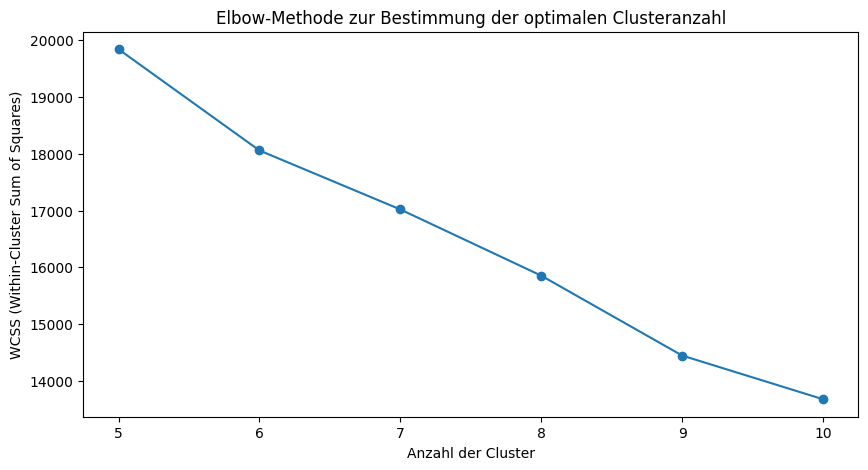

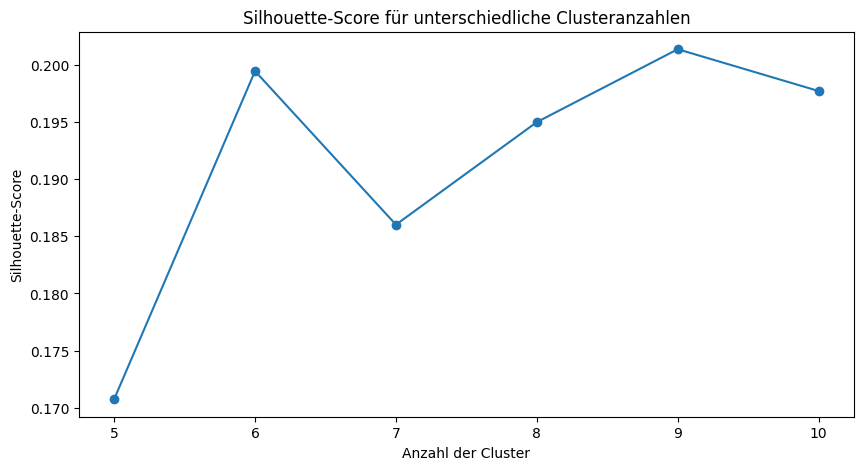

Optimale Anzahl an Clustern: 9


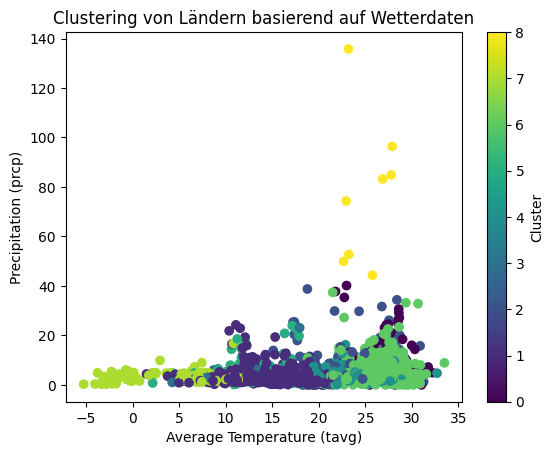

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Nur numerische Spalten für das Clustering extrahieren
numerical_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']
values = cleaned_data[numerical_columns]

# Standardisierung der Daten (falls nicht bereits standardisiert)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(values)

# Finden der optimalen Anzahl an Clustern mit der Elbow-Methode
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
cluster_range = range(5, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_values)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_values, kmeans.labels_))

# Elbow-Methode visualisieren
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Silhouette-Score visualisieren
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette-Score für unterschiedliche Clusteranzahlen')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Silhouette-Score')
plt.show()

# Optimale Anzahl an Clustern basierend auf Silhouette-Score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimale Anzahl an Clustern: {optimal_clusters}')

# K-Means mit optimaler Clusteranzahl
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(scaled_values)

# Ergebnisse speichern
cleaned_data.to_csv('clustered_weather_data.csv', index=False)

plt.scatter(cleaned_data['tavg'], cleaned_data['prcp'], c=cleaned_data['Cluster'], cmap='viridis')
plt.xlabel('Average Temperature (tavg)')
plt.ylabel('Precipitation (prcp)')
plt.title('Clustering von Ländern basierend auf Wetterdaten')
plt.colorbar(label='Cluster')
plt.show()


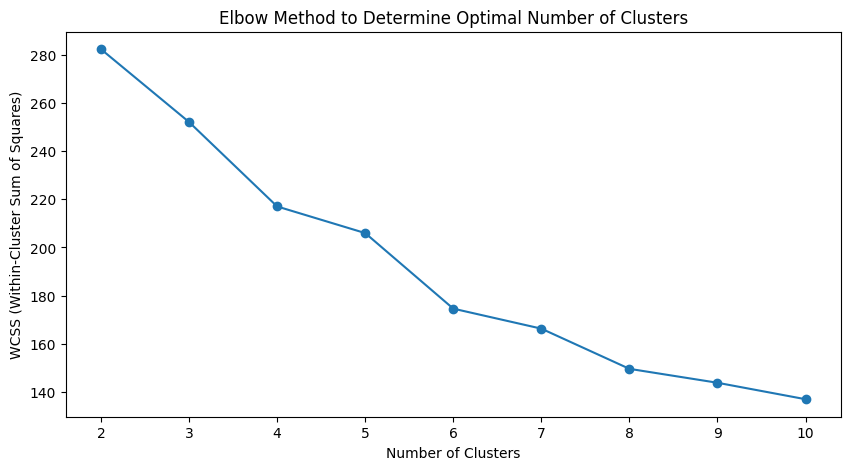

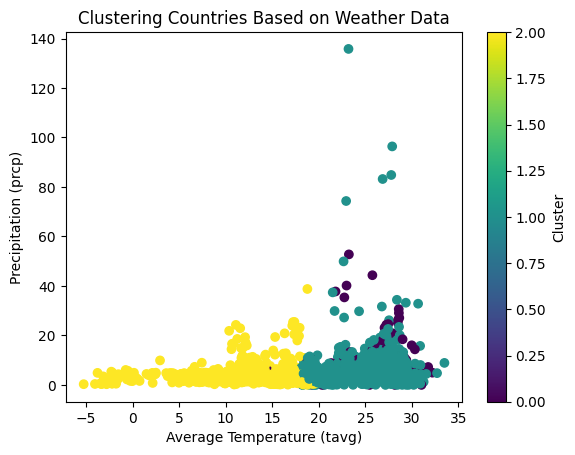

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Extracting only numeric columns for clustering
numerical_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']
values = cleaned_data[numerical_columns]

# Normalizing data using Min-Max Scaler
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values)

# Finding the optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster Sum of Squares
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_values)
    wcss.append(kmeans.inertia_)

# Visualizing the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Assuming the optimal number of clusters is chosen manually from the elbow plot
optimal_clusters = int(input("Enter the optimal number of clusters based on the Elbow plot: "))

# Performing K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(normalized_values)

# Save results
clustered_file_path = 'clustered_weather_data.csv'
cleaned_data.to_csv(clustered_file_path, index=False)

# Scatter plot to visualize clusters
plt.scatter(cleaned_data['tavg'], cleaned_data['prcp'], c=cleaned_data['Cluster'], cmap='viridis')
plt.xlabel('Average Temperature (tavg)')
plt.ylabel('Precipitation (prcp)')
plt.title('Clustering Countries Based on Weather Data')
plt.colorbar(label='Cluster')
plt.show()
